In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Daftar file CSV yang diunggah
file_paths = [
    "/content/Produksi Tanaman Sayuran Menurut Kecamatan dan Jenis Tanaman di Kabupaten Sukabumi, 2019.csv",
    "/content/Produksi Tanaman Sayuran Menurut Kecamatan dan Jenis Tanaman di Kabupaten Sukabumi, 2020.csv",
    "/content/Produksi Tanaman Sayuran Menurut Kecamatan dan Jenis Tanaman di Kabupaten Sukabumi, 2021.csv",
    "/content/Produksi Tanaman Sayuran Menurut Kecamatan dan Jenis Tanaman di Kabupaten Sukabumi, 2022.csv",
    "/content/Produksi Tanaman Sayuran Menurut Kecamatan dan Jenis Tanaman di Kabupaten Sukabumi, 2023.csv"
]

In [ ]:
# Membaca semua file CSV dan menambah kolom tahun
dataframes = []
years = [2019, 2020, 2021, 2022, 2023]

for file, year in zip(file_paths, years):
    df = pd.read_csv(file)
    df["Tahun"] = year  # Menambahkan kolom Tahun
    dataframes.append(df)

In [ ]:
# Menggabungkan semua DataFrame
df_combined = pd.concat(dataframes, ignore_index=True)

In [ ]:
# Menghapus kolom yang bukan produksi tanaman
kolom_sayuran = [col for col in df_combined.columns if "Produksi" in col]

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menjumlahkan produksi tiap jenis sayuran
produksi_per_tahun = df_combined.groupby("Tahun")[kolom_sayuran].sum()

In [ ]:
df_combined.head(10)

,Kecamatan,Produksi Bawang Daun (kuintal) (Kw),Produksi Bawang Merah (kuintal) (Kw),Produksi Bawang Putih (kuintal) (Kw),Produksi Bayam (kuintal) (Kw),Produksi Blewah (kuintal) (Kw),Produksi Buncis (kuintal) (Kw),Produksi Cabai Besar (kuintal) (Kw),Produksi Cabai Rawit (kuintal) (Kw),Produksi Jamur (kilogram) (Kg),...,Produksi Wortel (kuintal) (Kw),Tahun,Produksi Cabai Besar/TW/Teropong (kuintal) (Kw),Produksi Cabai Keriting(kuintal) (Kw),Produksi Jamur Tiram (kuintal) (Kw),Produksi Jamur Merang (kuintal) (Kw),Produksi Jamur Lainnya (kuintal) (Kw),Produksi Jamur Tiram (kilogram) (Kg),Produksi Jamur Merang (kilogram) (Kg),Produksi Jamur Lainnya (kilogram) (Kg)
0,Ciemas,0.0,120.0,0.0,0.0,0.0,60.0,100.0,24041.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ciracap,0.0,95.0,0.0,0.0,0.0,0.0,115.0,225.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Waluran,80.0,0.0,0.0,0.0,0.0,230.0,172.0,2257.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Surade,0.0,1040.0,0.0,0.0,0.0,0.0,230.0,160.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cibitung,0.0,340.0,0.0,0.0,100.0,290.0,270.0,276.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Jampang Kulon,200.0,325.0,0.0,0.0,0.0,0.0,1510.0,1380.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Cimanggu,400.0,0.0,0.0,0.0,0.0,350.0,1965.0,100.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Kali Bunder,0.0,340.0,0.0,0.0,0.0,150.0,392.0,290.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Tegal Buleud,0.0,0.0,0.0,0.0,0.0,150.0,420.0,345.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Cidolog,0.0,0.0,0.0,0.0,0.0,180.0,39735.0,2089.0,0.0,...,0.0,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Melihat beberapa data pertama
print(df_combined.head())

  Kecamatan  Produksi Bawang Daun (kuintal) (Kw)  \
0    Ciemas                                  NaN   
1   Ciracap                                  NaN   
2   Waluran                                 80.0   
3    Surade                                  NaN   
4  Cibitung                                  NaN   

   Produksi Bawang Merah (kuintal) (Kw)  Produksi Bawang Putih (kuintal) (Kw)  \
0                                 120.0                                   NaN   
1                                  95.0                                   NaN   
2                                   NaN                                   NaN   
3                                1040.0                                   NaN   
4                                 340.0                                   NaN   

   Produksi Bayam (kuintal) (Kw)  Produksi Blewah (kuintal) (Kw)  \
0                            NaN                             NaN   
1                            NaN                             NaN

In [ ]:
# Mengecek missing values
print(df_combined.isnull().sum())

Kecamatan                                            2
Produksi Bawang Daun (kuintal) (Kw)                150
Produksi Bawang Merah (kuintal) (Kw)               189
Produksi Bawang Putih (kuintal) (Kw)               243
Produksi Bayam (kuintal) (Kw)                      221
Produksi Blewah (kuintal) (Kw)                     244
Produksi Buncis (kuintal) (Kw)                      85
Produksi Cabai Besar (kuintal) (Kw)                162
Produksi Cabai Rawit (kuintal) (Kw)                 31
Produksi Jamur (kilogram) (Kg)                     240
Produksi Kacang Merah (kuintal) (Kw)               230
Produksi Kacang Panjang (kuintal) (Kw)              38
Produksi Kangkung (kuintal) (Kw)                   187
Produksi Kembang Kol (kuintal) (Kw)                229
Produksi Kentang (kuintal) (Kw)                    236
Produksi Ketimun (kuintal) (Kw)                     23
Produksi Kubis (kuintal) (Kw)                      204
Produksi Labu Siam (kuintal) (Kw)                  194
Produksi L

In [ ]:
# Mengisi missing values dengan 0 jika ada
df_combined.fillna(0, inplace=True)

In [ ]:
# Daftar sayuran yang ingin dianalisis
sayuran_terpilih = [ "Tahun",
    "Produksi Bawang Daun (kuintal) (Kw)",
    "Produksi Bawang Merah (kuintal) (Kw)",
    "Produksi Bawang Putih (kuintal) (Kw)",
    "Produksi Bayam (kuintal) (Kw)",
    "Produksi Blewah (kuintal) (Kw)",
    "Produksi Buncis (kuintal) (Kw)",
    "Produksi Cabai Besar (kuintal) (Kw)",
    "Produksi Cabai Rawit (kuintal) (Kw)",
    "Produksi Jamur (kilogram) (Kg)",
    "Produksi Kacang Merah (kuintal) (Kw)",
    "Produksi Kacang Panjang (kuintal) (Kw)",
    "Produksi Kangkung (kuintal) (Kw)",
    "Produksi Kembang Kol (kuintal) (Kw)",
    "Produksi Kentang (kuintal) (Kw)",
    "Produksi Ketimun (kuintal) (Kw)",
    "Produksi Kubis (kuintal) (Kw)",
    "Produksi Labu Siam (kuintal) (Kw)",
    "Produksi Lobak (kuintal) (Kw)",
    "Produksi Melon (kuintal) (Kw)",
    "Produksi Paprika (kuintal) (Kw)",
    "Produksi Petsai/Sawi (kuintal) (Kw)",
    "Produksi Semangka (kuintal) (Kw)",
    "Produksi Stroberi (kuintal) (Kw)",
    "Produksi Terung (kuintal) (Kw)",
    "Produksi Tomat (kuintal) (Kw)",
    "Produksi Wortel (kuintal) (Kw)",
    "Produksi Cabai Besar/TW/Teropong (kuintal) (Kw)",
    "Produksi Cabai Keriting(kuintal) (Kw)",
    "Produksi Jamur Tiram (kuintal) (Kw)",
    "Produksi Jamur Tiram (kilogram) (Kg)",
    "Produksi Jamur Merang (kuintal) (Kw)",
    "Produksi Jamur Merang (kilogram) (Kg)",
    "Produksi Jamur Lainnya (kilogram) (Kg)",
    "Produksi Jamur Lainnya (kuintal) (Kw)",

]

# Menghitung total produksi per tahun untuk sayuran tertentu
produksi_per_tahun_sayuran = df_combined.groupby("Tahun")[sayuran_terpilih].sum()
print(produksi_per_tahun_sayuran)

        Tahun  Produksi Bawang Daun (kuintal) (Kw)  \
Tahun                                                
2019    96912                             111164.0   
2020    96960                             114610.0   
2021    97008                             155780.0   
2022   103122                             166092.0   
2023   103173                             139065.0   

       Produksi Bawang Merah (kuintal) (Kw)  \
Tahun                                         
2019                                 7100.0   
2020                                12156.0   
2021                                21720.0   
2022                                 6658.0   
2023                                10462.0   

       Produksi Bawang Putih (kuintal) (Kw)  Produksi Bayam (kuintal) (Kw)  \
Tahun                                                                        
2019                                 5498.0                         2992.0   
2020                                    0.0              

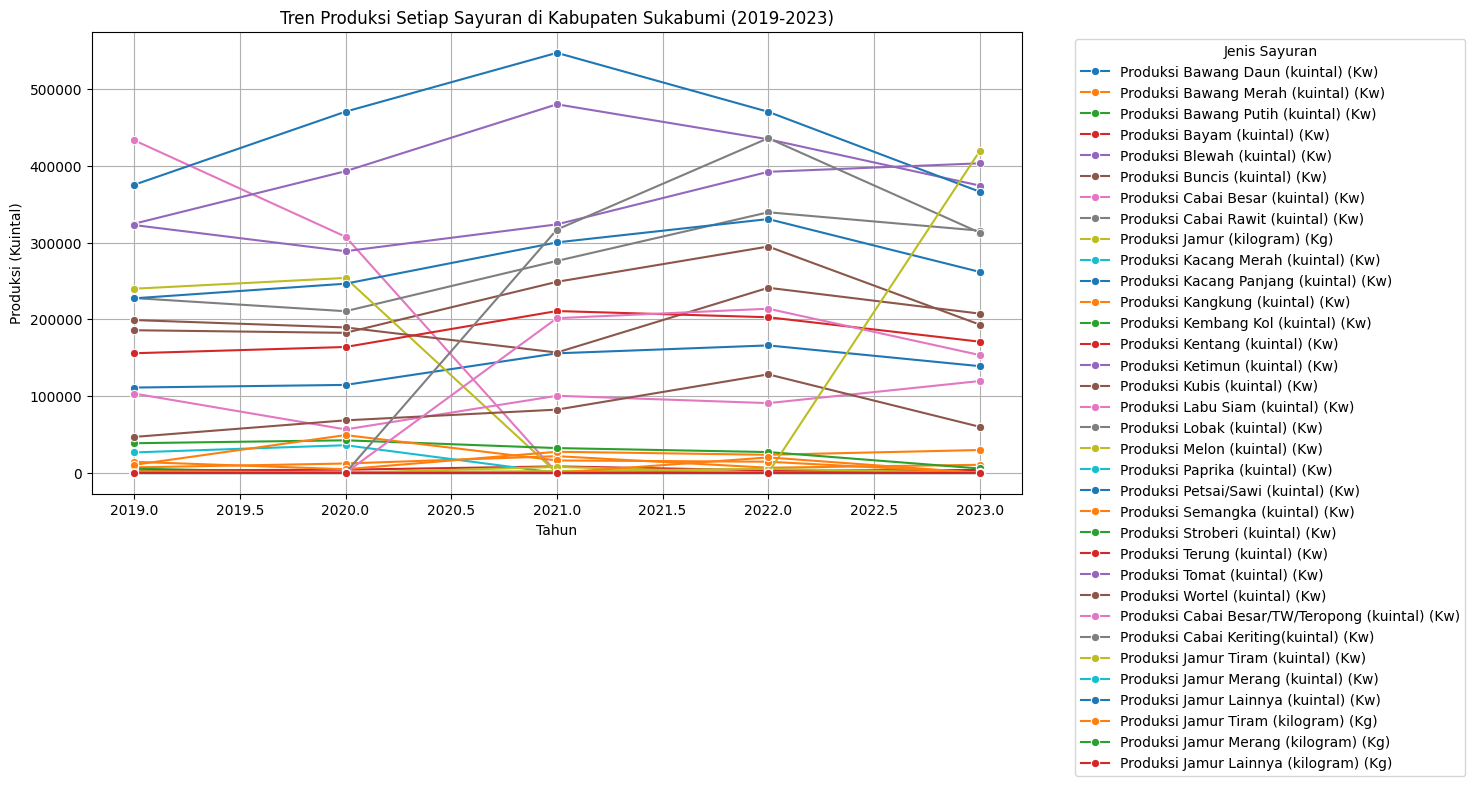

In [ ]:
#Plot tren produksi untuk setiap sayuran
plt.figure(figsize=(12, 6))

for sayur in kolom_sayuran:
    sns.lineplot(x=produksi_per_tahun.index, y=produksi_per_tahun[sayur], marker="o", label=sayur)

plt.title("Tren Produksi Setiap Sayuran di Kabupaten Sukabumi (2019-2023)")
plt.xlabel("Tahun")
plt.ylabel("Produksi (Kuintal)")
plt.legend(title="Jenis Sayuran", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

<ipython-input-47-cd6c7e05970e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produksi_total.values, y=produksi_total.index, palette="viridis")


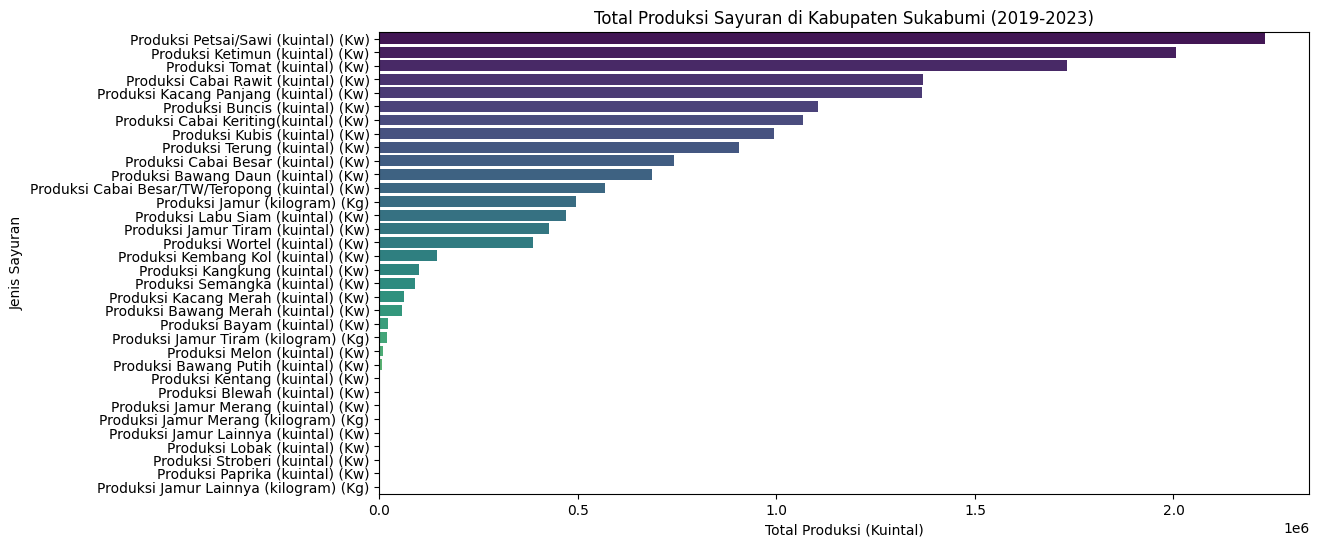

In [ ]:
# Menghitung total produksi per jenis sayuran
produksi_total = df_combined[kolom_sayuran].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=produksi_total.values, y=produksi_total.index, palette="viridis")

plt.title("Total Produksi Sayuran di Kabupaten Sukabumi (2019-2023)")
plt.xlabel("Total Produksi (Kuintal)")
plt.ylabel("Jenis Sayuran")
plt.show()

In [ ]:
# Membuat DataFrame untuk menyimpan prediksi
future_years = [2024, 2025, 2026, 2027, 2028]
predictions = pd.DataFrame(index=future_years, columns=kolom_sayuran)

# Melakukan prediksi untuk setiap jenis sayuran
for sayur in kolom_sayuran:
    model = ARIMA(produksi_per_tahun[sayur], order=(2, 1, 2))  # Order bisa disesuaikan
    model_fit = model.fit()

    # Prediksi untuk 5 tahun ke depan
    forecast = model_fit.forecast(steps=5)

    # Simpan hasil prediksi
    predictions[sayur] = forecast.values

# Menampilkan hasil prediksi
print(predictions)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

      Produksi Bawang Daun (kuintal) (Kw)  \
2024                        138612.945411   
2025                        132138.171084   
2026                        131298.678129   
2027                        132955.898667   
2028                        133433.687511   

      Produksi Bawang Merah (kuintal) (Kw)  \
2024                           6280.811468   
2025                          10728.798862   
2026                           6468.881036   
2027                          10768.378206   
2028                           6542.547731   

      Produksi Bawang Putih (kuintal) (Kw)  Produksi Bayam (kuintal) (Kw)  \
2024                            651.702960                    2148.757263   
2025                            761.456222                    3899.160742   
2026                            868.400688                    2316.254126   
2027                            909.602803                    3969.923314   
2028                            933.232482                    2383.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#Variabel eksternal dataset sesuai faktor lingkungan yang tersedia
df_combined["Curah Hujan"] = [random.randint(100, 300) for _ in range(len(df_combined))]
df_combined["Suhu Rata-rata"] = [random.uniform(20, 30) for _ in range(len(df_combined))]

In [ ]:
# Memisahkan variabel fitur (X) dan target (Y)
X = df_combined[["Tahun", "Curah Hujan", "Suhu Rata-rata"]]
Y = df_combined[kolom_sayuran]

In [ ]:
# Membagi data untuk pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Model prediksi
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediksi untuk tahun 2024-2028
future_X = pd.DataFrame({
    "Tahun": future_years,
    "Curah Hujan": [250, 260, 270, 280, 290],  # Estimasi faktor eksternal
    "Suhu Rata-rata": [25, 26, 27, 28, 29]
})

predictions_rf = model.predict(future_X)

In [ ]:
# Menampilkan prediksi produksi sayuran
predictions_df = pd.DataFrame(predictions_rf, index=future_years, columns=kolom_sayuran)
print(predictions_df)

      Produksi Bawang Daun (kuintal) (Kw)  \
2024                              663.885   
2025                            11638.150   
2026                             7236.230   
2027                            15007.235   
2028                            10244.985   

      Produksi Bawang Merah (kuintal) (Kw)  \
2024                                448.29   
2025                               1191.62   
2026                                290.87   
2027                                920.65   
2028                                648.99   

      Produksi Bawang Putih (kuintal) (Kw)  Produksi Bayam (kuintal) (Kw)  \
2024                                  0.00                         14.454   
2025                                  0.00                        495.326   
2026                                  0.00                        112.366   
2027                                  0.00                        328.514   
2028                                164.94                        2

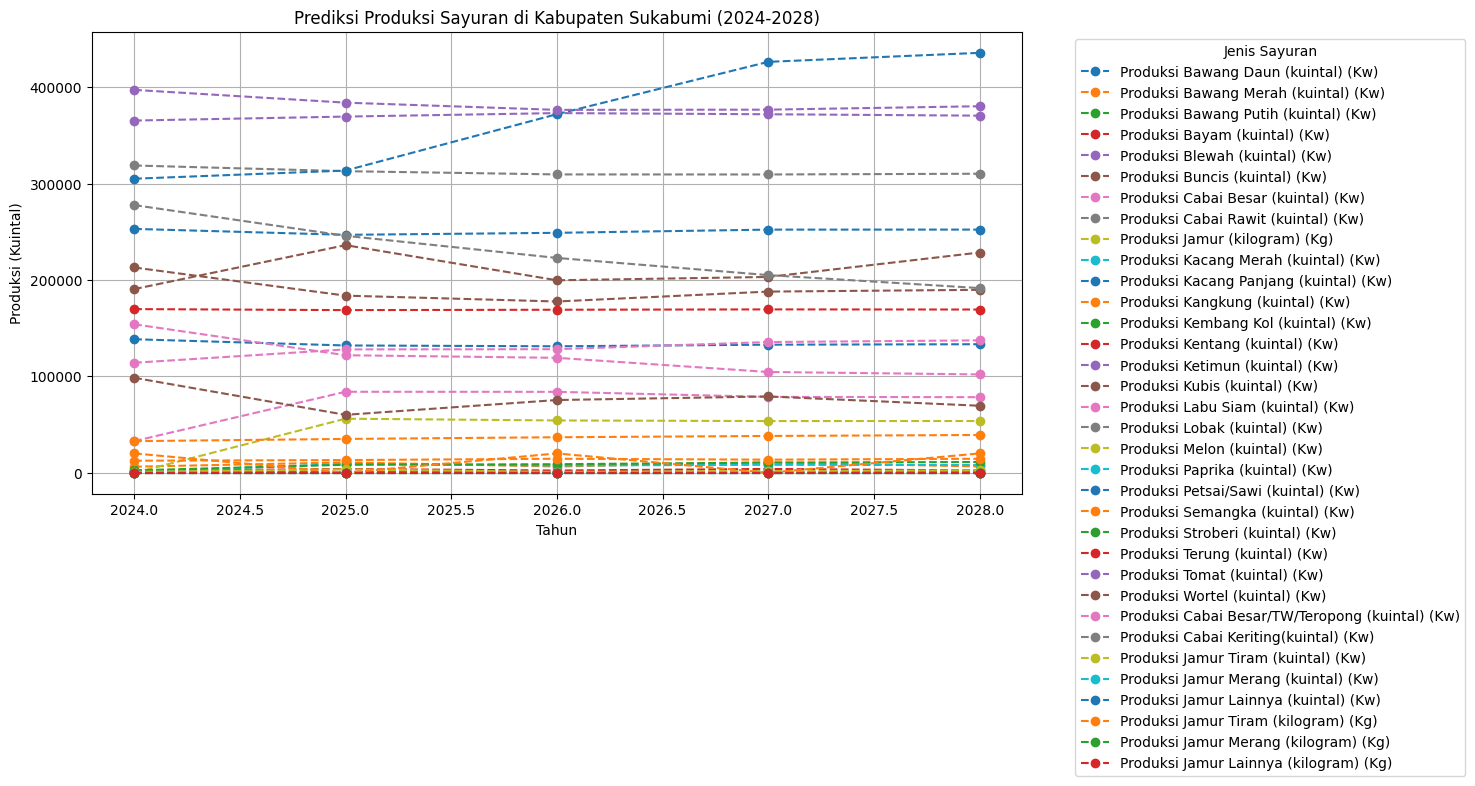

In [ ]:
#Visualisasi line plot prediksi produksi sayuran tahun 2024 - 2028
plt.figure(figsize=(12, 6))

for sayur in kolom_sayuran:
    plt.plot(future_years, predictions[sayur], marker="o", linestyle="--", label=sayur)

plt.title("Prediksi Produksi Sayuran di Kabupaten Sukabumi (2024-2028)")
plt.xlabel("Tahun")
plt.ylabel("Produksi (Kuintal)")
plt.legend(title="Jenis Sayuran", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()